# Описание данных

Данные - специально подготовленная выборка из полного набора, описанного здесь: https://mengtingwan.github.io/data/goodreads#datasets с дополнениями из https://www.kaggle.com/datasets/austinreese/goodreads-books:
- books: перечень книг (~44 тыс.) из списка https://www.goodreads.com/list/show/1.Best_Books_Ever (совпадение по book id),
- interactions: взаимодействие пользователей с книгами

Основной массив данных был собран в конце 2017.

# Инициализация

In [26]:
import logging

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [27]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.figure_format = 'retina'

Создаём логгер, который удобен для использования в ноутбуке.

# Load Data

Загружаем данные как они есть, начинаем на них смотреть: какие в них есть сущности, атрибуты, распределения.

In [28]:
books = pd.read_parquet("books.parquet")

In [29]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43312 entries, 3 to 2360448
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   book_id               43312 non-null  int64  
 1   author                43312 non-null  object 
 2   title                 43312 non-null  object 
 3   description           43312 non-null  object 
 4   genre_and_votes       43312 non-null  object 
 5   num_pages             37001 non-null  Int64  
 6   average_rating        43312 non-null  float64
 7   ratings_count         43312 non-null  Int64  
 8   text_reviews_count    43312 non-null  int64  
 9   publisher             43312 non-null  object 
 10  publication_year      35891 non-null  Int64  
 11  country_code          43312 non-null  object 
 12  language_code         43312 non-null  object 
 13  format                43312 non-null  object 
 14  is_ebook              43312 non-null  bool   
 15  isbn                  

Пример данных по книгам

In [30]:
print(books[["book_id", "author", "title", "num_pages", "average_rating"]].sample(5, random_state=52).sort_values("book_id").set_index("book_id").to_string())

                                             author                                            title  num_pages  average_rating
book_id                                                                                                                        
69882                 Heinrich Böll, Patrick Bowles                      Billiards at Half-Past Nine        288            3.93
267533                               Robert Cormier                                         8 Plus 1        173            3.67
820966    Martin Luther, J.I. Packer, O.R. Johnston                          The Bondage of the Will        322            4.17
4532622                               Karen Hancock                                      The Enclave        492            3.82
20444381                             Diana Gabaldon  Os tambores de outono - 1ª Parte (Outlander #4)       1048            3.99


In [31]:
interactions = pd.read_parquet("interactions.parquet")

Можно оценить объём данных о взаимодействиях

In [32]:
interactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12890434 entries, 0 to 12914458
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      object
 1   book_id      int64 
 2   started_at   object
 3   read_at      object
 4   is_read      bool  
 5   rating       int64 
 6   is_reviewed  bool  
dtypes: bool(2), int64(2), object(3)
memory usage: 614.7+ MB


Пример данных по взаимодействиям

In [33]:
print(interactions[["user_id", "book_id", "started_at", "read_at", "is_read", "rating"]].sample(5, random_state=52).sort_values("user_id").set_index(["user_id", "book_id"]).to_string())

                                           started_at     read_at  is_read  rating
user_id                          book_id                                          
0447747f44c0d8d1a08cf329fe253f29 10054335  2016-04-08  2016-04-20     True       3
14432756ffba6357686f09e4ccc332bb 26252859  2016-05-27  2016-05-30     True       5
46d6c8cf548d1c86abb671f42ba71b5e 960       2014-08-06  2016-10-29     True       5
71c2b3714945af1f700f49953904c510 18492859  2014-10-09  2014-10-12     True       5
7802bafdeac8abff23a72b9dd60b1dd1 18710190  2015-03-01  2015-05-05     True       4


# EDA

Посмотрим на данные о книгах, какие поля есть.

In [34]:
books.sample(3).T

,1801022,2345090,608557
book_id,282363,6908180,2224813
author,"Hisaya Nakajo, David Ury",Thomas Siddell,Tom Godwin
title,"Hana-Kimi, Vol. 8 (Hana-Kimi, #8)","Gunnerkrigg Court, Vol. 2: Research (Gunnerkri...","The Survivors (Ragnarok, #1)"
description,MALE MODELS\nTired of Sano and Mizuki taking t...,Annie and Kat begin their second year at Gunne...,"Crushing gravity, thin air, freezing winter, s..."
genre_and_votes,"{'Sequential Art-Manga': 684, 'Romance': 48, '...","{'Fantasy': 173, 'Sequential Art-Comics': 136,...","{'Science Fiction': 51, 'Fiction': 15}"
num_pages,192,296,136
average_rating,4.36,4.42,3.87
ratings_count,3137,2343,212
text_reviews_count,26,89,33
publisher,"VIZ Media, LLC",Archaia,Wildside Press


Посмотрим на данные о взаимодействиях пользователей с книгами.

In [35]:
books["book_id"].nunique()

43312

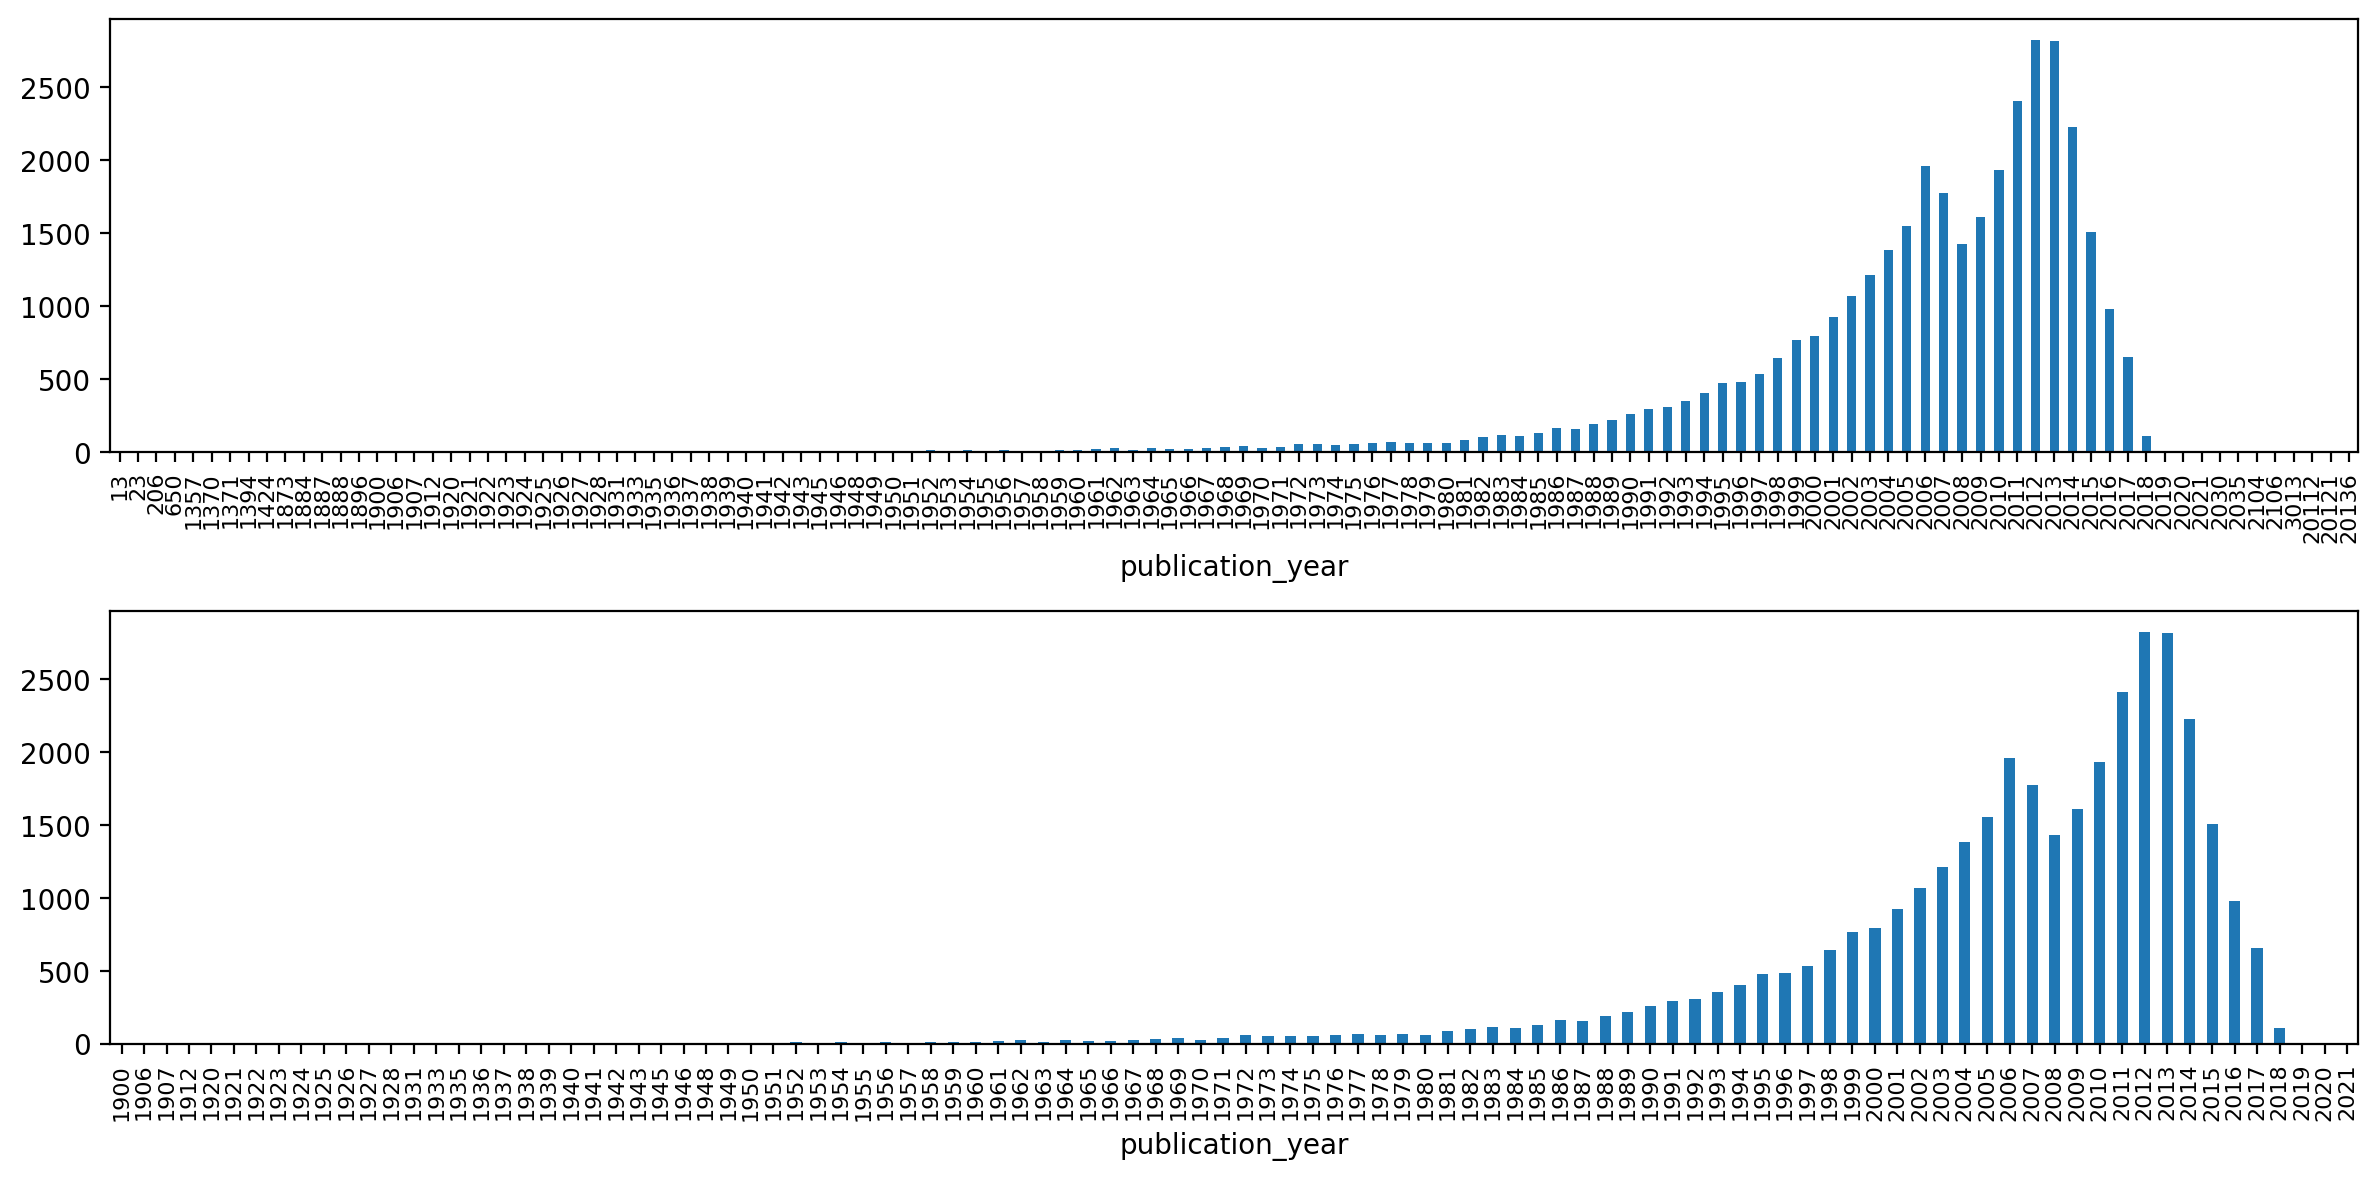

In [36]:
# распределение книг по годам публикации

fig, axs = plt.subplots(2, 1, figsize=(12, 6))

ax = axs[0]
books["publication_year"].value_counts().sort_index().plot(kind="bar", ax=ax)
ax.tick_params(axis='x', labelsize=8)

ax = axs[1]
books.query("publication_year >= 1900 and publication_year <= 2025")["publication_year"].value_counts().sort_index().plot(kind="bar", ax=ax)
ax.tick_params(axis='x', labelsize=8)

fig.tight_layout()

# События по месяцам

In [37]:
from pandas.tseries.offsets import MonthEnd

interactions["started_at_month"] = pd.to_datetime(interactions["started_at"]).dt.to_period('M').dt.to_timestamp().dt.date

In [38]:
interactions_by_month = interactions.groupby("started_at_month").agg(events=("started_at", "count"), users=("user_id", "nunique")).reset_index()

In [39]:
interactions_by_month

,started_at_month,events,users
0,2007-01-01,1993,1071
1,2007-02-01,201,135
2,2007-03-01,222,152
3,2007-04-01,201,135
4,2007-05-01,204,138
...,...,...,...
127,2017-08-01,202129,93040
128,2017-09-01,172187,82694
129,2017-10-01,108107,58076
130,2017-11-01,565,475


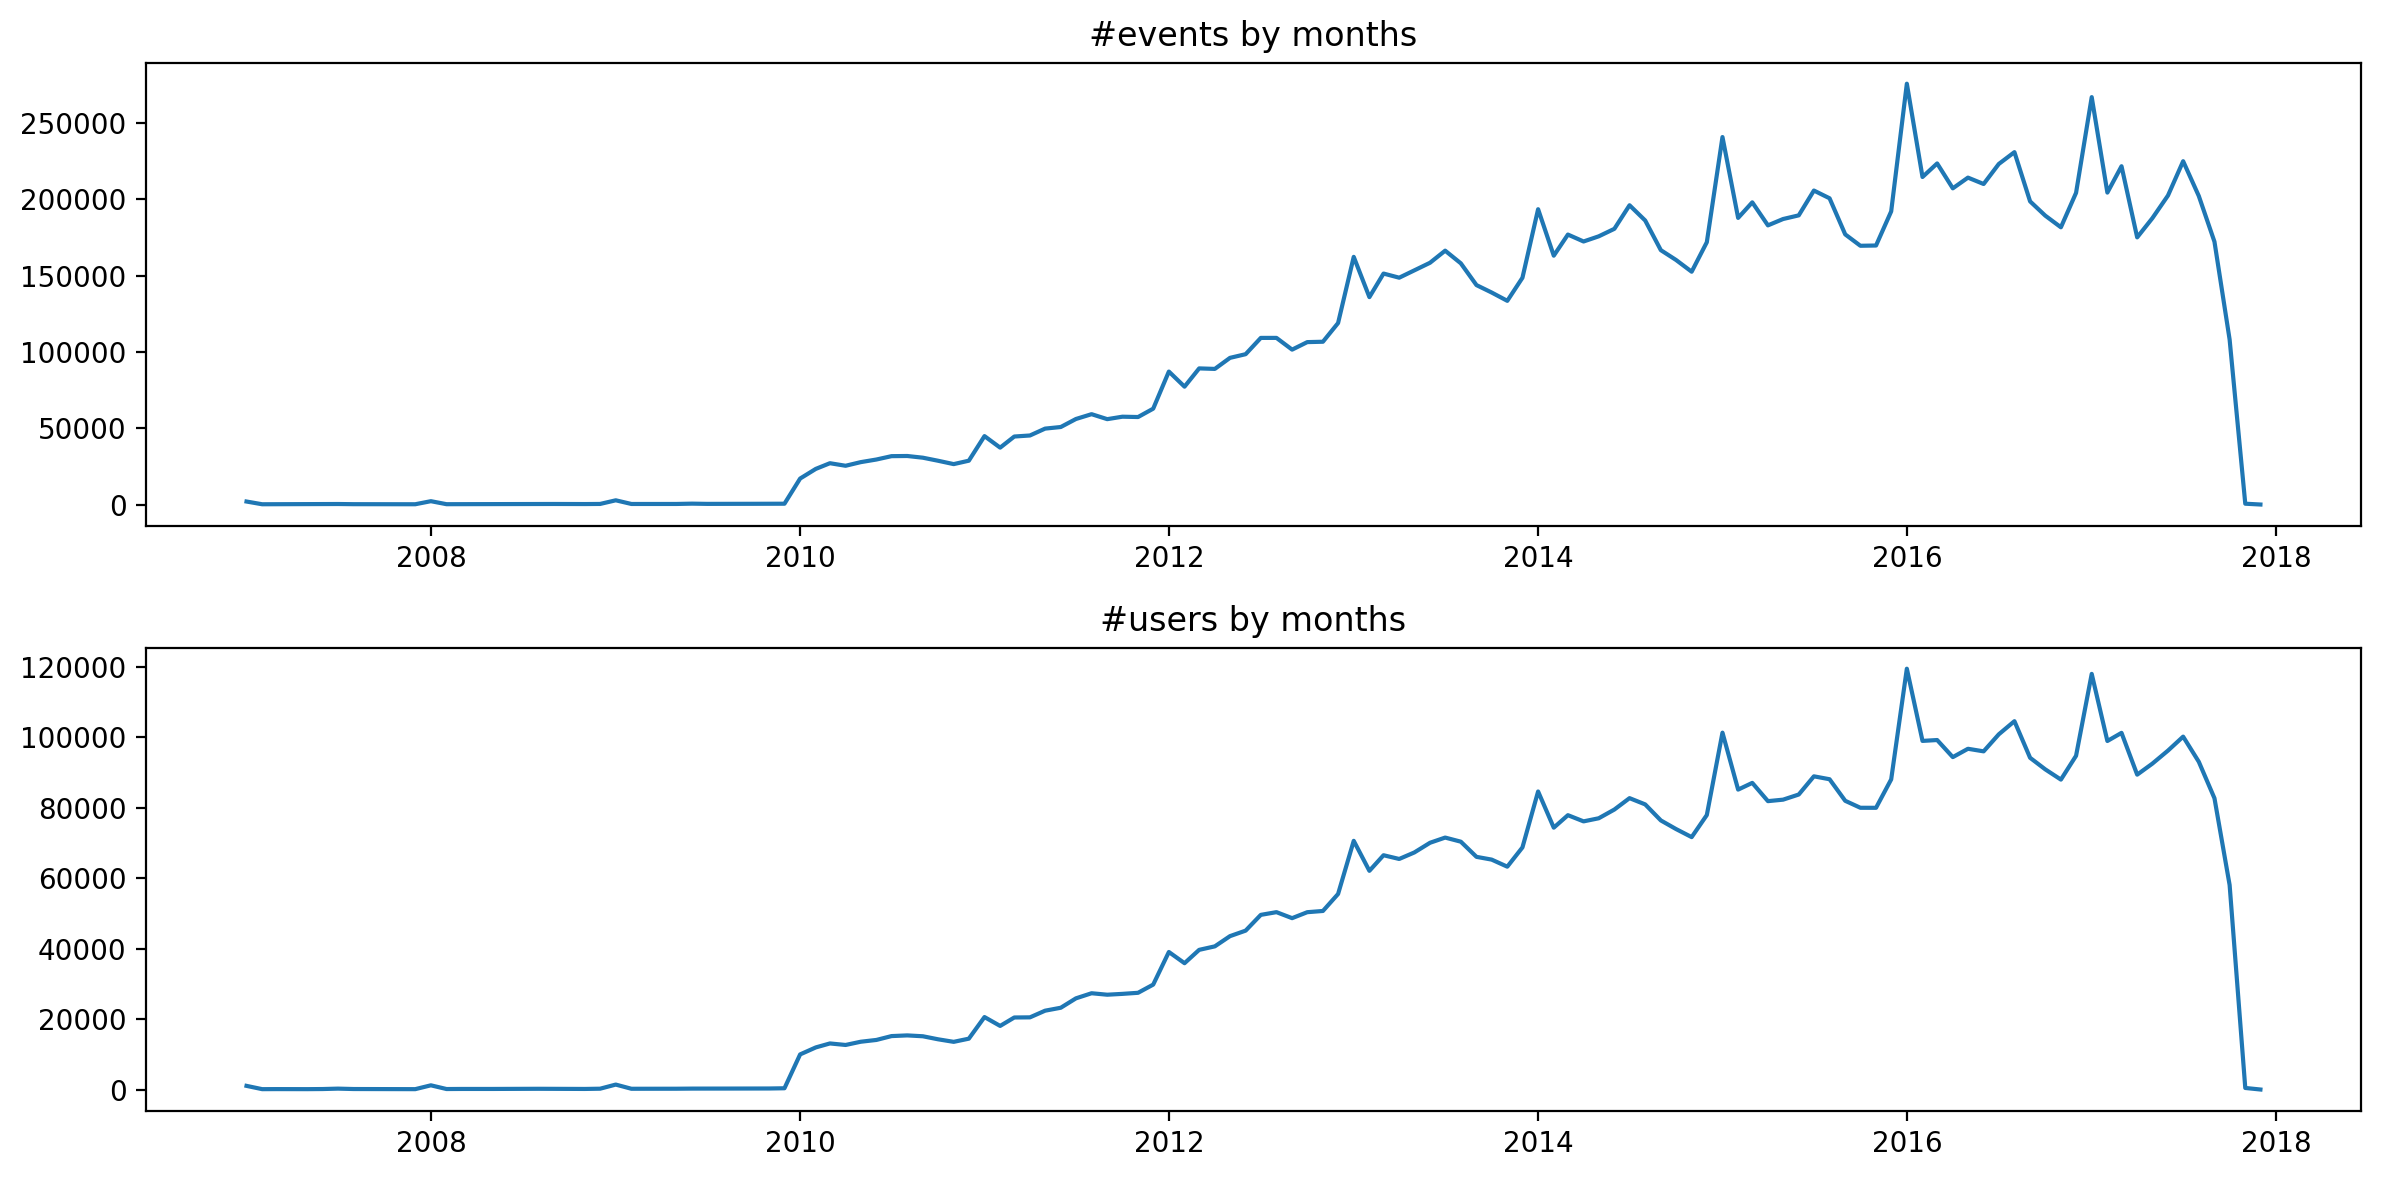

In [40]:
# распределение взаимодействий по годам

fig, axs = plt.subplots(2, 1, figsize=(12, 6))

ax = axs[0]
ax.plot(interactions_by_month["started_at_month"], interactions_by_month["events"])
# ax.tick_params(axis='x', labelsize=8)
ax.set_title("#events by months")

ax = axs[1]
ax.plot(interactions_by_month["started_at_month"], interactions_by_month["users"])
# ax.tick_params(axis='x', labelsize=8)
ax.set_title("#users by months")

fig.tight_layout()

# Преобработка

Примем новые именования:
- books -> items (более обобщённое название)
- interactions -> events (несколько короче, удобнее в коде)

In [41]:
items = books.copy()
events = interactions.copy()

In [ ]:
#del books
#del interactions

In [43]:
# оставим события только до ноября 2017

event_cutoff_date = pd.to_datetime("2017-11-01").date()
events = events.query("started_at < @event_cutoff_date and read_at < @event_cutoff_date").copy()

# Ваш код здесь

In [48]:
events = events[events['rating'] != 0]
events = events[events['is_read'] == True]
user_counts = events['user_id'].value_counts()
valid_users = user_counts[user_counts >= 2].index
events = events[events['user_id'].isin(valid_users)]
items = items.rename(columns={'book_id': 'item_id'})
events = events.rename(columns={'book_id': 'item_id'})

unique_users = sorted(events['user_id'].unique())
user_id_map = {old_id: new_id for new_id, old_id in enumerate(unique_users, start=1_000_000)}

events['user_id'] = events['user_id'].map(user_id_map)



# Сохранение результатов

In [45]:
items.to_parquet("items.par")

In [46]:
events.to_parquet("events.par")

In [47]:
print( (len(events)+len(items)) / (len(books) + len(interactions)) )

0.9119088932162422


In [ ]:
old_id = '8f50136afeb65c55cec7b3d306c24b03'
new_id = user_id_map.get(old_id)

print(f"Старый user_id: {old_id} → Новый user_id: {new_id}")


Старый user_id: 8f50136afeb65c55cec7b3d306c24b03 → Новый user_id: 1241243


In [ ]:
# зададим точку разбиения
train_test_global_time_split_date = pd.to_datetime("2017-08-01").date()

train_test_global_time_split_idx = events["started_at"] < train_test_global_time_split_date
events_train = events[train_test_global_time_split_idx]
events_test = events[~train_test_global_time_split_idx]

# количество пользователей в train и test
users_train = events_train["user_id"].drop_duplicates()
users_test = events_test["user_id"].drop_duplicates()
# количество пользователей, которые есть и в train, и в test
common_users = pd.merge(users_train, users_test, on="user_id", how='inner')


print(len(users_train), len(users_test), len(common_users))

428220 123223 120858


In [ ]:
cold_users = users_test[~users_test.isin(users_train)]

print(len(cold_users))

2365


In [57]:
from sklearn.preprocessing import MinMaxScaler

top_pop_start_date = pd.to_datetime("2015-01-01").date()

item_popularity = events_train \
    .query("started_at >= @top_pop_start_date") \
    .groupby(["item_id"]).agg(users=("user_id", "nunique"), avg_rating=("rating", "mean")).reset_index()

# нормализация пользователей и среднего рейтинга, требуется для их приведения к одному масштабу
scaler = MinMaxScaler()
item_popularity[["users_norm", "avg_rating_norm"]] = scaler.fit_transform(
    item_popularity[["users", "avg_rating"]]
)

# вычисляем popularity_score, как скор популярности со штрафом за низкий рейтинг
item_popularity["popularity_score"] = (
    item_popularity["users_norm"] * item_popularity["avg_rating_norm"]
)

# сортируем по убыванию popularity_score
item_popularity = item_popularity.sort_values(by="popularity_score", ascending=False)

# выбираем первые 100 айтемов со средней оценкой avg_rating не меньше 4
top_k_pop_items = item_popularity.query("avg_rating >= 4").head(100)

In [58]:
print(top_k_pop_items)

        item_id  users  avg_rating  users_norm  avg_rating_norm  \
32387  18007564  20207    4.321275    0.496596         0.830319   
32623  18143977  19462    4.290669    0.478287         0.822667   
2             3  15139    4.706057    0.372042         0.926514   
30695  16096824  16770    4.301014    0.412126         0.825253   
1916      15881  13043    4.632447    0.320529         0.908112   
...         ...    ...         ...         ...              ...   
24837   8490112   4792    4.080968    0.117747         0.770242   
33611  18966819   4361    4.374914    0.107154         0.843729   
378        3636   4667    4.098564    0.114675         0.774641   
32835  18293427   4674    4.092640    0.114847         0.773160   
37118  26252859   4371    4.293068    0.107400         0.823267   

       popularity_score  
32387          0.412333  
32623          0.393471  
2              0.344702  
30695          0.340108  
1916           0.291076  
...                 ...  
24837        

In [59]:
top_k_pop_items = top_k_pop_items.merge(
    items.set_index("item_id")[["author", "title", "genre_and_votes", "publication_year"]], on="item_id")

with pd.option_context('display.max_rows', 100):
    display(top_k_pop_items[["item_id", "author", "title", "publication_year", "users", "avg_rating", "popularity_score", "genre_and_votes"]])

,item_id,author,title,publication_year,users,avg_rating,popularity_score,genre_and_votes
0,18007564,Andy Weir,The Martian,2014,20207,4.321275,0.412333,"{'Science Fiction': 11966, 'Fiction': 8430}"
1,18143977,Anthony Doerr,All the Light We Cannot See,2014,19462,4.290669,0.393471,"{'Historical-Historical Fiction': 13679, 'Fict..."
2,3,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...,1997,15139,4.706057,0.344702,"{'Fantasy': 59818, 'Fiction': 17918, 'Young Ad..."
3,16096824,Sarah J. Maas,A Court of Thorns and Roses (A Court of Thorns...,2015,16770,4.301014,0.340108,"{'Fantasy': 14326, 'Young Adult': 4662, 'Roman..."
4,15881,"J.K. Rowling, Mary GrandPré",Harry Potter and the Chamber of Secrets (Harry...,1999,13043,4.632447,0.291076,"{'Fantasy': 50130, 'Young Adult': 15202, 'Fict..."
5,38447,Margaret Atwood,The Handmaid's Tale,1998,14611,4.232770,0.290194,"{'Fiction': 15424, 'Classics': 9937, 'Science ..."
6,11235712,Marissa Meyer,"Cinder (The Lunar Chronicles, #1)",2012,14348,4.179189,0.280247,"{'Young Adult': 10539, 'Fantasy': 9237, 'Scien..."
7,17927395,Sarah J. Maas,A Court of Mist and Fury (A Court of Thorns an...,2016,12177,4.730640,0.279094,"{'Fantasy': 10186, 'Romance': 3346, 'Young Adu..."
8,5,"J.K. Rowling, Mary GrandPré",Harry Potter and the Prisoner of Azkaban (Harr...,2004,11890,4.770143,0.275401,"{'Fantasy': 49784, 'Young Adult': 15393, 'Fict..."
9,13206900,Marissa Meyer,"Winter (The Lunar Chronicles, #4)",2015,12291,4.534293,0.266881,"{'Fantasy': 4835, 'Young Adult': 4672, 'Scienc..."


In [60]:
cold_users_events_with_recs = \
    events_test[events_test["user_id"].isin(cold_users)] \
    .merge(top_k_pop_items[["item_id", "avg_rating"]], on="item_id", how="left")

cold_user_items_no_avg_rating_idx = cold_users_events_with_recs["avg_rating"].isnull()
cold_user_recs = cold_users_events_with_recs[~cold_user_items_no_avg_rating_idx] \
    [["user_id", "item_id", "rating", "avg_rating"]]

In [67]:
print("Доля совпадений:", round(cold_users_events_with_recs["avg_rating"].notnull().sum() / len(cold_users_events_with_recs), 2))


Доля совпадений: 0.2


In [69]:
# посчитаем метрики рекомендаций
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(cold_user_recs["rating"], cold_user_recs["avg_rating"], squared=False)
mae = mean_absolute_error(cold_user_recs["rating"], cold_user_recs["avg_rating"])
print(round(rmse, 2), round(mae, 2))

0.78 0.62
